# This is just sample for the time series forecasting using Prophet



# we used sample electrical household consumption dataset from kaggle

# This should output the consumption by category and forecast for the next 30 days in the website.


In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse
from sklearn.model_selection import train_test_split

In [6]:
!pip install pandas

In [281]:
df_pd = pd.read_csv("C:/Users/18178/Downloads/ar/household_power_consumption.txt", sep=';')

C:\Users\18178\AppData\Local\Temp\ipykernel_2300\4115999619.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pd = pd.read_csv("C:/Users/18178/Downloads/ar/household_power_consumption.txt", sep=';')


In [153]:
    df_pd_1000.dtypes

Date                                    object
Time                                    object
minute-averaged_active_power            object
Global_reactive_power                   object
Voltage                                 object
Global_intensity                        object
kitchen                                 object
laundry                                 object
water_heater                           float64
Timestamp                       datetime64[ns]
dtype: object

In [ ]:
pd.to_datetime()

In [282]:
new_column_names = {'global_active_power': 'minute-averaged_active_power', 'sub_metering_1': 'kitchen', 'sub_metering_2':'laundry','sub_metering_3':'water_heater'}

# Use the rename() method to rename columns
df_pd.rename(columns=new_column_names, inplace=True)  # Use inplace=True to modify the DataFrame in place


In [283]:
df_pd.rename(columns={'Global_active_power': 'minute-averaged_active_power', 'Sub_metering_1': 'kitchen', 'Sub_metering_2': 'laundry', 'Sub_metering_3': 'water_heater'}, inplace=True)


In [284]:
df_pd_1000=df_pd.head(200000)

In [285]:
df_pd_1000['ds'] = pd.to_datetime(df_pd_1000['Date'] + ' ' + df_pd_1000['Time'])

C:\Users\18178\AppData\Local\Temp\ipykernel_2300\2506672184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pd_1000['ds'] = pd.to_datetime(df_pd_1000['Date'] + ' ' + df_pd_1000['Time'])


In [286]:
a=df_pd_1000.rename(columns={'minute-averaged_active_power': 'y'})

In [287]:
a

,Date,Time,y,Global_reactive_power,Voltage,Global_intensity,kitchen,laundry,water_heater,ds
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00
...,...,...,...,...,...,...,...,...,...,...
199995,4/5/2007,14:39:00,0.348,0.120,235.480,1.600,0.000,0.000,0.0,2007-04-05 14:39:00
199996,4/5/2007,14:40:00,0.344,0.118,234.920,1.600,0.000,0.000,0.0,2007-04-05 14:40:00
199997,4/5/2007,14:41:00,0.342,0.118,234.410,1.600,0.000,0.000,0.0,2007-04-05 14:41:00
199998,4/5/2007,14:42:00,0.340,0.114,233.880,1.600,0.000,0.000,0.0,2007-04-05 14:42:00


In [288]:
a = a.drop(columns=['Date', 'Time'])

In [289]:
a

,y,Global_reactive_power,Voltage,Global_intensity,kitchen,laundry,water_heater,ds
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00
...,...,...,...,...,...,...,...,...
199995,0.348,0.120,235.480,1.600,0.000,0.000,0.0,2007-04-05 14:39:00
199996,0.344,0.118,234.920,1.600,0.000,0.000,0.0,2007-04-05 14:40:00
199997,0.342,0.118,234.410,1.600,0.000,0.000,0.0,2007-04-05 14:41:00
199998,0.340,0.114,233.880,1.600,0.000,0.000,0.0,2007-04-05 14:42:00


In [290]:
a=a.drop(['Global_reactive_power', 'Voltage','Global_intensity', 'kitchen','laundry','water_heater'], axis =1)

In [291]:
a

,y,ds
0,4.216,2006-12-16 17:24:00
1,5.360,2006-12-16 17:25:00
2,5.374,2006-12-16 17:26:00
3,5.388,2006-12-16 17:27:00
4,3.666,2006-12-16 17:28:00
...,...,...
199995,0.348,2007-04-05 14:39:00
199996,0.344,2007-04-05 14:40:00
199997,0.342,2007-04-05 14:41:00
199998,0.340,2007-04-05 14:42:00


In [253]:
a.set_index("ds", inplace=True)

In [293]:
a.isna().sum()

y     0
ds    0
dtype: int64

In [162]:
df_pd_1000=df_pd_1000.fillna(method="ffill")

In [83]:
df_pd_1000.dtypes

minute-averaged_active_power    float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
kitchen                         float64
laundry                         float64
water_heater                    float64
dtype: object

     ---------------------------------------- 64.0/64.0 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 47.9/47.9 kB 2.4 MB/s eta 0:00:00
     ------------------------------------- 754.4/754.4 kB 16.2 MB/s eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 26.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.4/1.4 MB 30.2 MB/s eta 0:00:00
     -------------------------------------- 156.2/156.2 kB 9.7 MB/s eta 0:00:00
     -------------------------------------- 157.5/157.5 kB 9.2 MB/s eta 0:00:00
     ---------------------------------------- 91.8/91.8 kB 5.4 MB/s eta 0:00:00
     --------------------------------------- 16.2/16.2 MB 31.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): fini

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\functional\hash\extensions.hpp -> build\lib.win-amd64-cpython-39\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\functional\hash
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\functional\hash\hash.hpp -> build\lib.win-amd64-cpython-39\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\functional\hash
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\functional\hash\hash_fwd.hpp -> build\lib.win-amd64-cpython-39\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\functional\hash
  creating build\lib.win-amd64-cpython-39\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\functional\overloaded_

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [132]:
columns_to_convert = ['minute-averaged_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'kitchen', 'laundry', 'water_heater']

# Use pd.to_numeric to convert the specified columns to float
df_pd_1000[columns_to_convert] = df_pd_1000[columns_to_convert].apply(pd.to_numeric, errors='coerce')


In [294]:
# Define the percentage split (e.g., 80% train, 20% test)
train_size = 0.8

# Split the data into training and testing sets
train, test = train_test_split(a, train_size=train_size, shuffle=False)


In [295]:
model = VAR(train)
model_fit = model.fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [296]:
from statsmodels.tsa.api import VECM

# Assuming you have a DataFrame 'df' with columns 'total_power', 'predictor_var1', 'predictor_var2', 'predictor_var3'
model = VECM(df_pd_1000)
model_fit = model.fit()

# Make predictions
n_steps = len(test)
pred = model_fit.predict(steps=n_steps)

# Evaluate the model
from statsmodels.tools.eval_measures import rmse
rmse_score = rmse(test['averaged_active_power'], pred[:, 0])
print(f'RMSE: {rmse_score:.2f}')


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [136]:
!pip install prophet

     --------------------------------------- 12.9/12.9 MB 32.8 MB/s eta 0:00:00
     ---------------------------------------- 83.2/83.2 kB 4.6 MB/s eta 0:00:00
  Using cached holidays-0.32-py3-none-any.whl (754 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)


In [140]:

from prophet import Prophet

In [297]:
# Rename columns if needed
a=a.rename(columns={'ds': 'ds', 'minute-averaged_active_power': 'y'})

# Add exogenous variables (if any) as extra columns
# df['exog_variable_1'] = ...
# df['exog_variable_2'] = ...


In [298]:
a.dtypes

y             object
ds    datetime64[ns]
dtype: object

In [260]:
a.reset_index()


,ds,y
0,2006-12-16 17:24:00,4.216
1,2006-12-16 17:25:00,5.360
2,2006-12-16 17:26:00,5.374
3,2006-12-16 17:27:00,5.388
4,2006-12-16 17:28:00,3.666
...,...,...
19995,2006-12-30 14:39:00,1.880
19996,2006-12-30 14:40:00,1.902
19997,2006-12-30 14:41:00,1.886
19998,2006-12-30 14:42:00,1.888


In [299]:
columns_to_convert = ['y']

# Use pd.to_numeric to convert the specified columns to float
a[columns_to_convert] = a[columns_to_convert].apply(pd.to_numeric, errors='coerce')


In [300]:
a.columns

Index(['y', 'ds'], dtype='object')

21:39:19 - cmdstanpy - INFO - Chain [1] start processing
21:47:47 - cmdstanpy - INFO - Chain [1] done processing


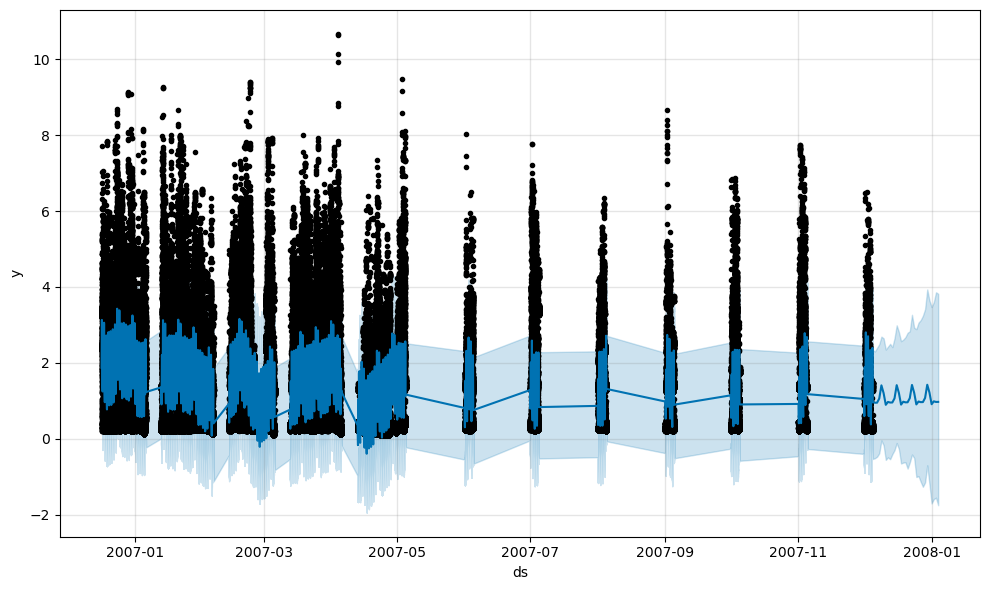

In [301]:
model = Prophet()

# If you have exogenous variables, add them here:
# model.add_regressor('exog_variable_1')
# model.add_regressor('exog_variable_2')

model.fit(a)
future = model.make_future_dataframe(periods=30)  # Example: Forecasting for 365 days into the future
forecast = model.predict(future)
fig = model.plot(forecast)


In [302]:

import numpy as np

# Assuming you have a DataFrame actual_data with a column 'y' containing the actual values
actual_values = a['y']

# Extract the forecasted values from the Prophet forecast DataFrame
forecasted_values = forecast['yhat']

# Calculate the RMSE
rmse = np.sqrt(((actual_values - forecasted_values) ** 2).mean())

print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 1.2418829836186325


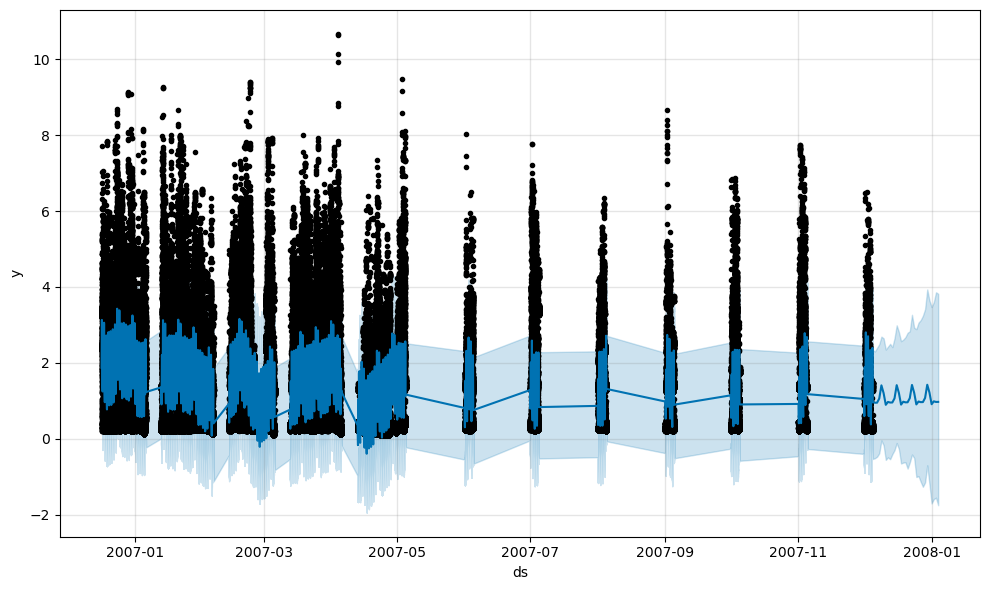

In [303]:
fig = model.plot(forecast)
